In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [2]:
from matplotlib import rcParams
rcParams['axes.labelpad'] = 20

In [3]:
N = 20
x = np.linspace(-2, 2, N+1)
x,y = np.meshgrid(x,x)

In [4]:
z_grid = np.ones((N+1, N+1)) / 10

In [5]:
rv1 = multivariate_normal([.5, .5], [[.3, 0.], [0., .3]])
rv2 = multivariate_normal([-0.8, -.1], [[.4, 0.], [0., .1]])

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y


z_rsearch1 = rv1.pdf(pos)
z_rsearch2 = rv2.pdf(pos)

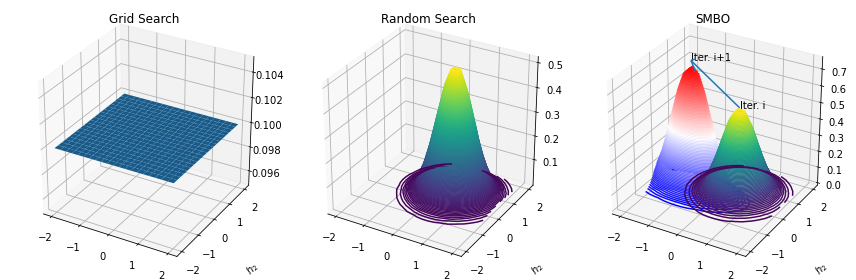

In [8]:
fig = plt.figure(figsize=(12,4))

# grid search
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x,y,z_grid)
ax1.set_xlabel('$h_1$')
ax1.set_ylabel('$h_2$')
ax1.set_zlabel('$P(h_1, h_2)$')
# ax1.set_xlim(0,1)
# ax1.set_ylim(0,1)

ax1.set_xticks(np.arange(-2, 3, 1.0))
ax1.set_yticks(np.arange(-2, 3, 1.0))



ax1.set_title('Grid Search')



# random search
ax2 = fig.add_subplot(132, projection='3d')
ax2.contour(x,y,z_rsearch1, alpha=1, levels=200)
ax2.set_xlabel('$h_1$')
ax2.set_ylabel('$h_2$')
ax2.set_zlabel('$P(h_1, h_2)$')
# ax2.set_xlim(0,1)
# ax2.set_ylim(0,1)
ax2.set_xticks(np.arange(-2, 3, 1.0))
ax2.set_yticks(np.arange(-2, 3, 1.0))
ax2.set_title('Random Search')


# random search
ax3 = fig.add_subplot(133, projection='3d')
# ax3.plot_surface(x,y,z_rsearch1, alpha=1)
# ax3.plot_surface(x,y,z_rsearch2, alpha=1)
ax3.contour(x,y,z_rsearch1, levels=100, alpha=1)
ax3.contour(x,y,z_rsearch2, levels=100, alpha=1, cmap='bwr')
ax3.set_xlabel('$h_1$')
ax3.set_ylabel('$h_2$')
ax3.set_zlabel('$P(h_1, h_2)$')

start = (0.5, 0.5, rv1.pdf([.5, .5]))
end   = (-0.8, -.1, rv2.pdf([-0.8, -.1]))
delta = np.array(end) - np.array(start)

ax3.quiver(*start, *delta, arrow_length_ratio=0.1)

# ax3.set_xlim(0,1)
# ax3.set_ylim(0,1)
ax3.set_xticks(np.arange(-2, 3, 1.0))
ax3.set_yticks(np.arange(-2, 3, 1.0))

ax3.text(*start, 'Iter. i',)
ax3.text(*end, 'Iter. i+1')

ax3.set_title('SMBO')
# ax3.legend()
plt.tight_layout()

plt.savefig('figures/hp_search_figure.pdf', type='pdf', bbox_inches='tight')

In [166]:
?ax3.text

Signature: ax3.text(x, y, z, s, zdir=None, **kwargs)
Docstring:
Add text to the plot. kwargs will be passed on to Axes.text,
except for the `zdir` keyword, which sets the direction to be
used as the z direction.
File:      e:\scriptieai\venvthesis\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py
Type:      method
